In [1]:
# pip install -U imbalanced-learn

In [1]:
#importing the essential  packages
import  numpy as  np  
import pandas as pd
import seaborn as sns

In [2]:
# importing the data  
df=pd.read_csv("data/UCI_Credit_Card.csv")
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
print(df.shape)

(30000, 25)


In [4]:
#  we  see that there  is no  null  values  in the  dataset 
# So,Handling  the missing  data is  not required  here
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
df.rename(columns={"default.payment.next.month":'default','PAY_0':'PAY_1'},inplace=True)

In [6]:
#checking the if  there  is  imbalance  in  data set  
df['default'].value_counts()
# here the datset inn imbalanced  thus is  has  more "no" classifcation 

0    23364
1     6636
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

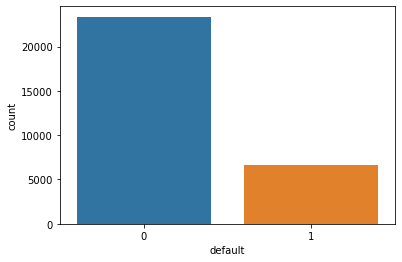

In [7]:
sns.countplot(x=df['default'])

#  Exploratory Data Analysis

## Education Feature


<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

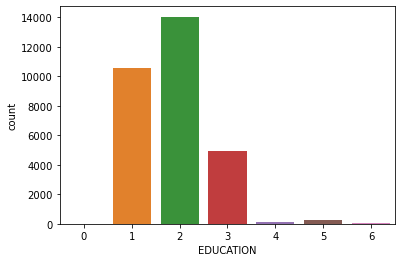

In [8]:
#as we can see  in EDUCATION  feature  the  5,6 is unknown  ,but  4  is  categorized as other  .so lets make 5,6 as others category(4)
sns.countplot(x=df['EDUCATION'])

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

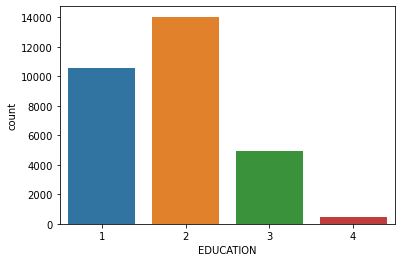

In [9]:
df['EDUCATION']=np.where((df['EDUCATION']==5 ) |(df['EDUCATION']==6)| (df['EDUCATION']==0),4,df['EDUCATION'])
sns.countplot(x=df['EDUCATION'])

In [10]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

# LIMIT_BAL

C:\Users\slrk4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

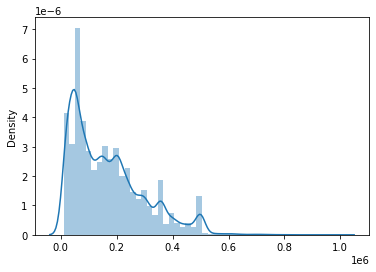

In [11]:
sns.distplot(x=df['LIMIT_BAL'])
#  from this ,we can say the  LIMIT_BAL  feature  is right skewed

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

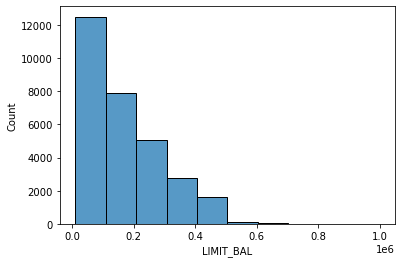

In [12]:
sns.histplot(x=df['LIMIT_BAL'],bins=10)

# SEX

<AxesSubplot:xlabel='SEX', ylabel='count'>

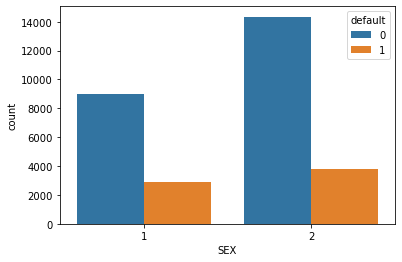

In [13]:
sns.countplot(x=df['SEX'],hue=df['default'])

In [14]:
df['SEX'].describe()

count    30000.000000
mean         1.603733
std          0.489129
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: SEX, dtype: float64

## MARRIAGE

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

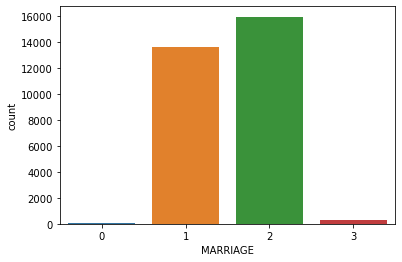

In [15]:
sns.countplot(x=df['MARRIAGE'])

In [16]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [17]:
# lets  make "0 "as "3"category
df['MARRIAGE']=np.where(df['MARRIAGE']==0,3,df['MARRIAGE'])

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

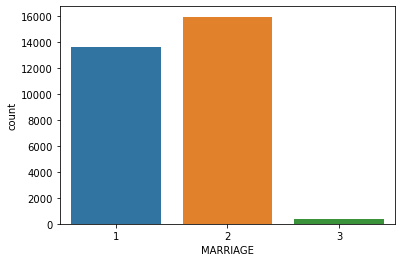

In [18]:
sns.countplot(x=df['MARRIAGE'])

In [19]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

##  Bill Amount

In [20]:
# bill_df= df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','default']]
# sns.pairplot(data=bill_df,hue='default')

## Pay Amount

In [21]:
# pay_df= df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']]
# sns.pairplot(data=bill_df,hue='default')

##  AGE  


C:\Users\slrk4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

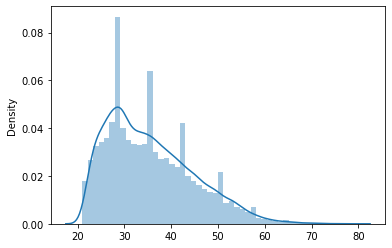

In [22]:
sns.distplot(x=df['AGE'])

<AxesSubplot:xlabel='AGE', ylabel='Count'>

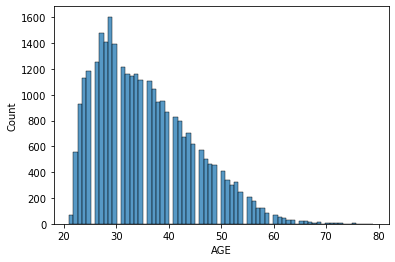

In [23]:
sns.histplot(x=df['AGE'])

# Balancing the dataset 

In [24]:
x_bl=df.copy().drop(['ID','default'],axis=1)
y_bl=df.copy().iloc[:,-1]

In [25]:
from imblearn.combine import SMOTETomek
ns=SMOTETomek()
x_bl,y_bl=ns.fit_resample(x_bl,y_bl)

In [26]:
print("The Dataset before Balancing: {},{}".format(df['default'].value_counts()[0],df['default'].value_counts()[1]))
print("The Dataset After Balancing: {} {}".format(y_bl.value_counts()[0],y_bl.value_counts()[1]))

The Dataset before Balancing: 23364,6636
The Dataset After Balancing: 22753 22753


In [27]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [28]:
bal_df=pd.DataFrame(x_bl,columns=[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [29]:
bal_df['default']=y_bl
bal_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# feature  engineering


In [30]:
bal_df['PAY_1']=np.where(bal_df['PAY_1']==-2,-1,bal_df['PAY_1'])

In [31]:
bal_df['PAY_2']=np.where(bal_df['PAY_2']==-2,-1,bal_df['PAY_2'])
bal_df['PAY_3']=np.where(bal_df['PAY_3']==-2,-1,bal_df['PAY_3'])
bal_df['PAY_4']=np.where(bal_df['PAY_4']==-2,-1,bal_df['PAY_4'])
bal_df['PAY_5']=np.where(bal_df['PAY_5']==-2,-1,bal_df['PAY_5'])
bal_df['PAY_6']=np.where(bal_df['PAY_6']==-2,-1,bal_df['PAY_6'])



In [32]:
bal_df['PAY_6'].value_counts()


 0    24086
-1    14300
 2     4554
 1     1940
 3      302
 7      125
 4      100
 6       57
 5       40
 8        2
Name: PAY_6, dtype: int64

<AxesSubplot:>

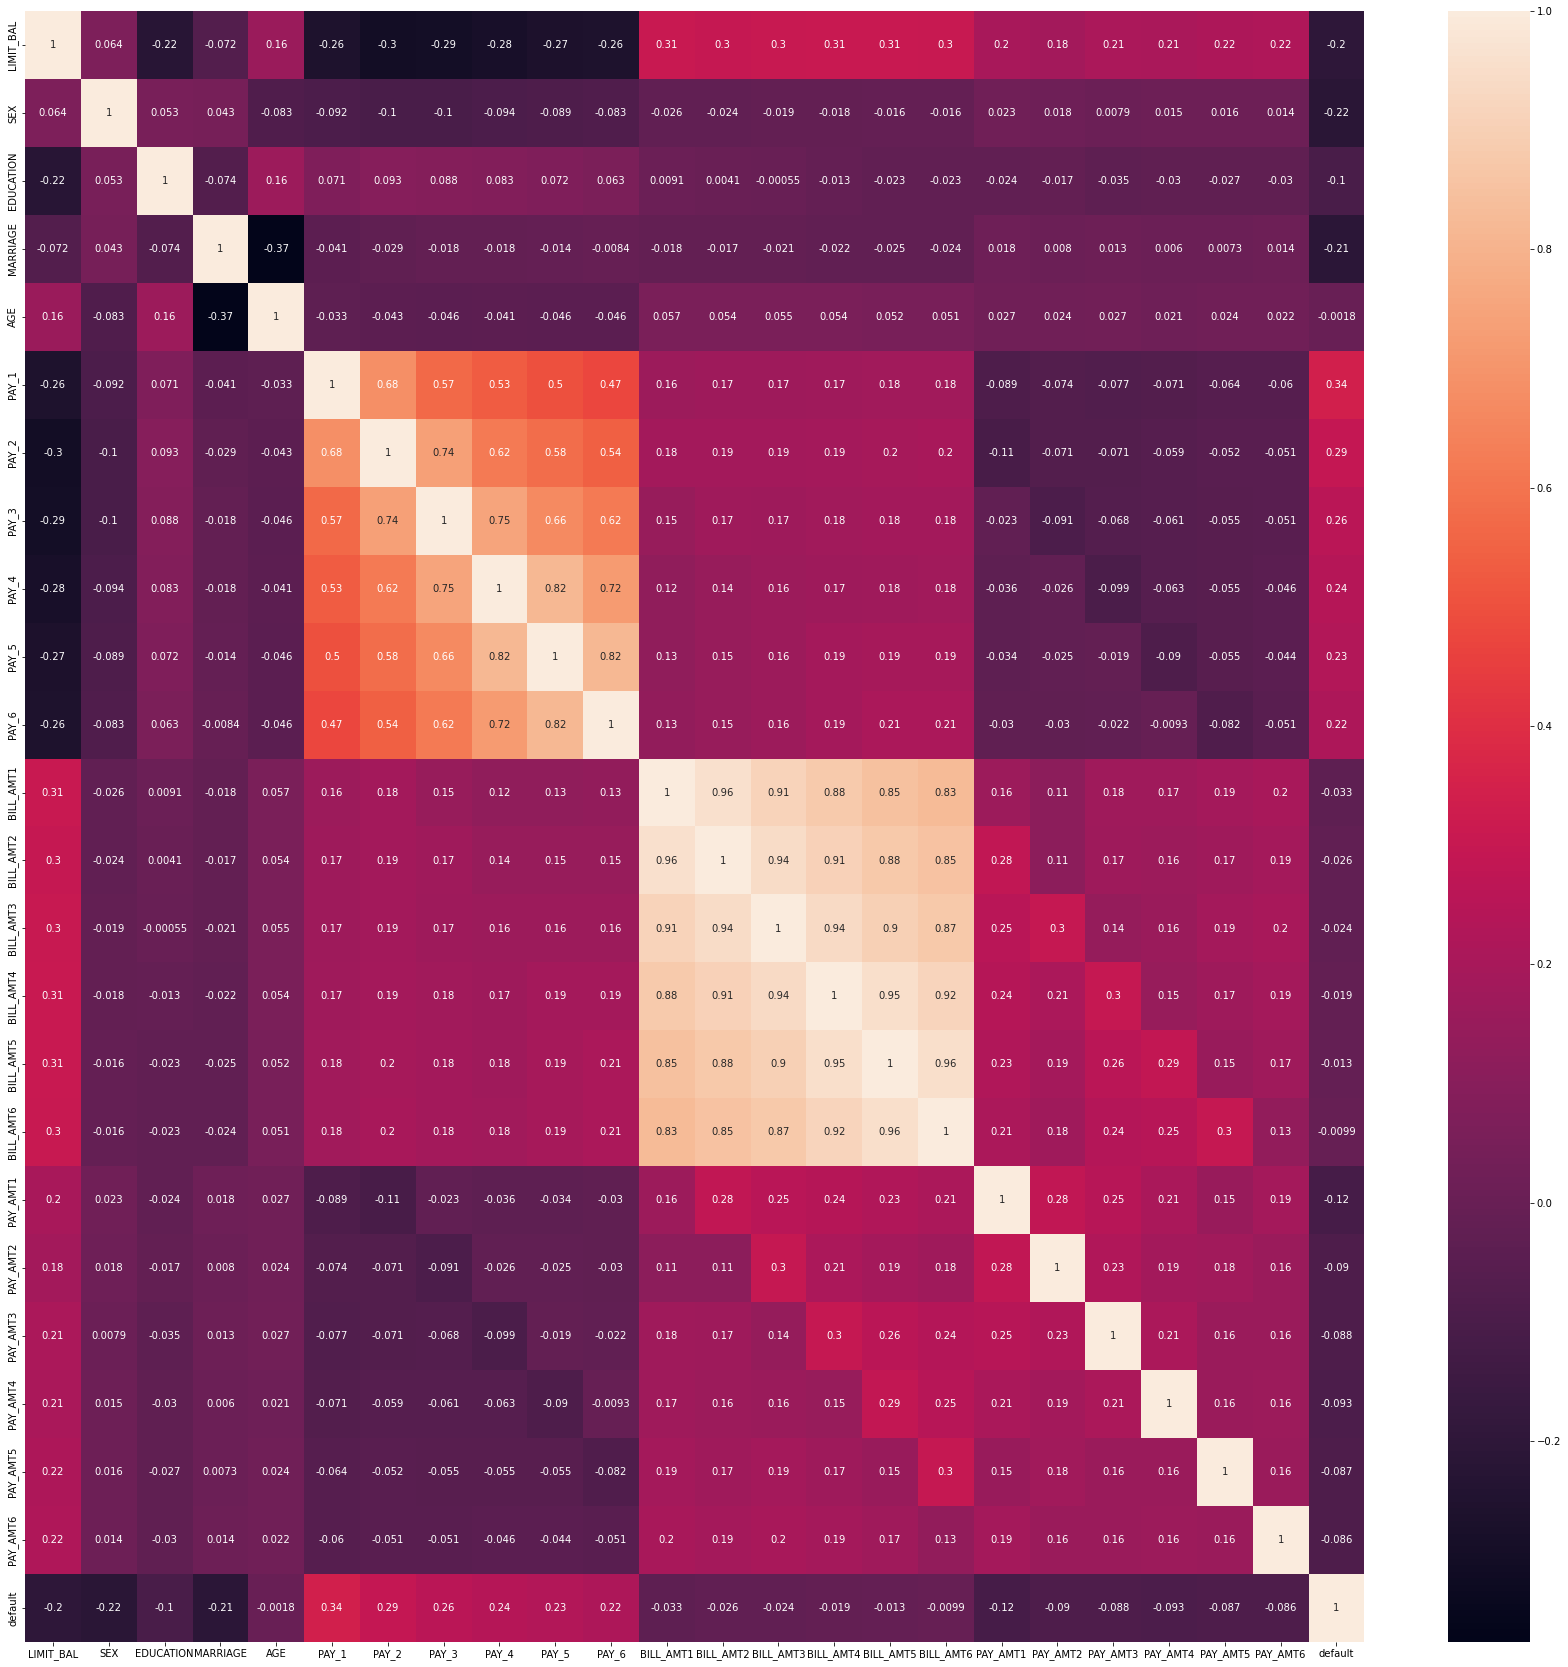

In [33]:

import matplotlib.pyplot as plt 
plt.figure(figsize=(30,30))
sns.heatmap(bal_df.corr(),annot=True)

In [40]:
x=bal_df[['LIMIT_BAL','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
y=bal_df.iloc[:,-1]
y

0        1
1        1
2        0
3        0
4        0
        ..
45501    1
45502    1
45503    1
45504    1
45505    1
Name: default, Length: 45506, dtype: int64

In [41]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [25,50,75,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 10)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 70, cv = 3, verbose=3, random_state=35, n_jobs = -1)

In [43]:
from  sklearn.model_selection import  train_test_split
x_tr_rf,x_ts_rf,y_tr_rf,y_ts_rf=train_test_split(x, y,test_size=0.3,random_state=42)

In [44]:
 rf_random.fit(x_tr_rf, y_tr_rf)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=70,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 22, 34, 46, 58, 71,
                                                      83, 95, 107, 120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [25, 50, 75, 100]},
                   random_state=35, verbose=3)

In [45]:
rf_random.best_score_

0.8230049601305959

In [47]:
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 71, 'bootstrap': False}  



In [48]:
randmf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 120, bootstrap=False) 

In [49]:
randmf.fit(x_tr_rf,y_tr_rf)

C:\Users\slrk4\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=120, max_features='auto')

In [50]:
from sklearn.metrics import accuracy_score ,confusion_matrix
y_pred=randmf.predict(x_ts_rf)
y_pred
accuracy_score(y_ts_rf,y_pred)

0.8515235862877234

<AxesSubplot:>

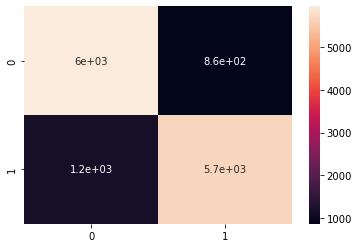

In [53]:
sns.heatmap(confusion_matrix(y_ts_rf,y_pred),annot=True)

# XGBoost


In [93]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(x_tr_rf, y_tr_rf)

    # Make predictions
    y_pred = optuna_model.predict(x_ts_rf)

    # Evaluate predictions
    accuracy = accuracy_score(y_ts_rf, y_pred)
    return accuracy

In [94]:
import optuna
from xgboost import XGBClassifier

study = optuna.create_study(direction='maximize')

[I 2022-11-05 12:57:25,183] A new study created in memory with name: no-name-1608cebc-47bc-4c57-a954-3cff2895574f


In [95]:
study.optimize(objective, n_trials=100)

C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': tr

[I 2022-11-05 12:57:31,194] Trial 3 finished with value: 0.7262725539093443 and parameters: {'max_depth': 5, 'learning_rate': 0.11580842459199067, 'n_estimators': 290, 'min_child_weight': 1, 'gamma': 2.6768785803576337e-07, 'subsample': 0.01274014760660791, 'colsample_bytree': 0.15448399033603985, 'reg_alpha': 6.593131192427253e-06, 'reg_lambda': 0.5184618002733705}. Best is trial 3 with value: 0.7262725539093443.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

[I 2022-11-05 12:57:40,627] Trial 7 finished with value: 0.7028751650286049 and parameters: {'max_depth': 5, 'learning_rate': 0.3247984635388245, 'n_estimators': 437, 'min_child_weight': 10, 'gamma': 8.034153878205657e-08, 'subsample': 0.016309699780046788, 'colsample_bytree': 0.03135864120590287, 'reg_alpha': 0.0017289868646623925, 'reg_lambda': 0.09414241749442262}. Best is trial 6 with value: 0.7904503447264193.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

[I 2022-11-05 12:57:49,648] Trial 11 finished with value: 0.7695467214317149 and parameters: {'max_depth': 9, 'learning_rate': 0.05317421740447724, 'n_estimators': 51, 'min_child_weight': 5, 'gamma': 0.7477334211975672, 'subsample': 0.9627293159652379, 'colsample_bytree': 0.9993276100519588, 'reg_alpha': 2.466331912681452e-06, 'reg_lambda': 0.00033474668066127037}. Best is trial 6 with value: 0.7904503447264193.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0

[I 2022-11-05 12:58:02,194] Trial 15 finished with value: 0.7803285902889834 and parameters: {'max_depth': 9, 'learning_rate': 0.2723701206313045, 'n_estimators': 227, 'min_child_weight': 10, 'gamma': 1.2601809899919379e-05, 'subsample': 0.41678966950796636, 'colsample_bytree': 0.41197636326494974, 'reg_alpha': 0.003199918757370888, 'reg_lambda': 1.4716478321853526e-08}. Best is trial 6 with value: 0.7904503447264193.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

[I 2022-11-05 12:58:11,987] Trial 19 finished with value: 0.6978876338565352 and parameters: {'max_depth': 9, 'learning_rate': 0.44442925837754493, 'n_estimators': 271, 'min_child_weight': 7, 'gamma': 0.00030071015288222683, 'subsample': 0.05021276299051552, 'colsample_bytree': 0.12132501473120533, 'reg_alpha': 0.024234904505743095, 'reg_lambda': 0.0033527494811214312}. Best is trial 6 with value: 0.7904503447264193.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

[I 2022-11-05 12:58:28,086] Trial 23 finished with value: 0.7674930321255684 and parameters: {'max_depth': 6, 'learning_rate': 0.0341388359011006, 'n_estimators': 385, 'min_child_weight': 4, 'gamma': 0.056041836855230974, 'subsample': 0.14990122045287627, 'colsample_bytree': 0.6360586482682337, 'reg_alpha': 0.009337035930171099, 'reg_lambda': 6.153535506937773e-06}. Best is trial 6 with value: 0.7904503447264193.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

[I 2022-11-05 12:58:50,666] Trial 27 finished with value: 0.7857561977409417 and parameters: {'max_depth': 7, 'learning_rate': 0.07224285760123814, 'n_estimators': 392, 'min_child_weight': 6, 'gamma': 0.14150077203499, 'subsample': 0.2847485562964546, 'colsample_bytree': 0.8310003553588211, 'reg_alpha': 0.01450896326655549, 'reg_lambda': 2.7789319547875017e-07}. Best is trial 24 with value: 0.7985917559043567.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

[I 2022-11-05 12:59:01,830] Trial 31 finished with value: 0.7560510488484671 and parameters: {'max_depth': 8, 'learning_rate': 0.13924678441271945, 'n_estimators': 302, 'min_child_weight': 4, 'gamma': 0.034079950735337365, 'subsample': 0.07003855901587941, 'colsample_bytree': 0.5319710874330421, 'reg_alpha': 0.2316272945365726, 'reg_lambda': 4.7763449801482086e-08}. Best is trial 24 with value: 0.7985917559043567.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

[I 2022-11-05 12:59:20,024] Trial 35 finished with value: 0.7856095056476456 and parameters: {'max_depth': 6, 'learning_rate': 0.08426336690847668, 'n_estimators': 338, 'min_child_weight': 2, 'gamma': 7.555689711717575e-05, 'subsample': 0.5033439830587676, 'colsample_bytree': 0.4156423641735271, 'reg_alpha': 1.0486564165740402e-08, 'reg_lambda': 6.325691761364605e-07}. Best is trial 24 with value: 0.7985917559043567.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

[I 2022-11-05 12:59:30,975] Trial 39 finished with value: 0.7420419539386827 and parameters: {'max_depth': 2, 'learning_rate': 0.02476506622260613, 'n_estimators': 474, 'min_child_weight': 2, 'gamma': 0.0026533455357306605, 'subsample': 0.33790560839986683, 'colsample_bytree': 0.48375340537555905, 'reg_alpha': 0.9103701646107186, 'reg_lambda': 4.3786956031302323e-07}. Best is trial 24 with value: 0.7985917559043567.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

[I 2022-11-05 12:59:48,072] Trial 43 finished with value: 0.7795217837758545 and parameters: {'max_depth': 3, 'learning_rate': 0.19556852427531904, 'n_estimators': 374, 'min_child_weight': 1, 'gamma': 9.28520960982594e-07, 'subsample': 0.8576376522545549, 'colsample_bytree': 0.9585571666326198, 'reg_alpha': 0.43662458636022894, 'reg_lambda': 2.115683621281361e-08}. Best is trial 24 with value: 0.7985917559043567.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

[I 2022-11-05 13:00:18,408] Trial 47 finished with value: 0.7948511075253044 and parameters: {'max_depth': 8, 'learning_rate': 0.0552694065319551, 'n_estimators': 454, 'min_child_weight': 3, 'gamma': 8.49133417825884e-06, 'subsample': 0.824382498940639, 'colsample_bytree': 0.3520381820044091, 'reg_alpha': 0.03131898448798249, 'reg_lambda': 3.428272608330542e-08}. Best is trial 24 with value: 0.7985917559043567.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

[I 2022-11-05 13:01:03,779] Trial 51 finished with value: 0.7938976089188793 and parameters: {'max_depth': 9, 'learning_rate': 0.042086553233362266, 'n_estimators': 497, 'min_child_weight': 3, 'gamma': 7.042930801076201e-06, 'subsample': 0.8336853039273171, 'colsample_bytree': 0.2943235176864462, 'reg_alpha': 0.02275939176563455, 'reg_lambda': 3.630335436757969e-08}. Best is trial 24 with value: 0.7985917559043567.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

[I 2022-11-05 13:01:43,670] Trial 55 finished with value: 0.7774680944697081 and parameters: {'max_depth': 8, 'learning_rate': 0.018129954996470857, 'n_estimators': 448, 'min_child_weight': 2, 'gamma': 5.438145763399502e-06, 'subsample': 0.8376763584658505, 'colsample_bytree': 0.4013244426909839, 'reg_alpha': 0.0019043456790833278, 'reg_lambda': 3.274128490336257e-07}. Best is trial 24 with value: 0.7985917559043567.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

[I 2022-11-05 13:02:14,296] Trial 59 finished with value: 0.785976235880886 and parameters: {'max_depth': 9, 'learning_rate': 0.04948324578543624, 'n_estimators': 409, 'min_child_weight': 5, 'gamma': 0.00017866174269439984, 'subsample': 0.573610142272789, 'colsample_bytree': 0.2694428174326089, 'reg_alpha': 0.04141173254428402, 'reg_lambda': 2.1400740710087904e-07}. Best is trial 24 with value: 0.7985917559043567.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

[I 2022-11-05 13:02:47,903] Trial 63 finished with value: 0.789423500073346 and parameters: {'max_depth': 9, 'learning_rate': 0.031360356323457766, 'n_estimators': 434, 'min_child_weight': 4, 'gamma': 3.0851673517314696e-07, 'subsample': 0.6113731200900927, 'colsample_bytree': 0.39685224393481044, 'reg_alpha': 0.008239596015517131, 'reg_lambda': 1.0594576395648918e-08}. Best is trial 24 with value: 0.7985917559043567.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

[I 2022-11-05 13:03:23,954] Trial 67 finished with value: 0.7740208302772481 and parameters: {'max_depth': 8, 'learning_rate': 0.01441640363859156, 'n_estimators': 448, 'min_child_weight': 3, 'gamma': 2.8925242502743678e-08, 'subsample': 0.47585203535465903, 'colsample_bytree': 0.5688476244216198, 'reg_alpha': 0.00010845677121438571, 'reg_lambda': 6.42347658455998e-07}. Best is trial 65 with value: 0.79961860055743.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

[I 2022-11-05 13:03:57,133] Trial 71 finished with value: 0.7921373037993252 and parameters: {'max_depth': 8, 'learning_rate': 0.04600031257140106, 'n_estimators': 465, 'min_child_weight': 3, 'gamma': 1.6258567949816639e-07, 'subsample': 0.7256609260785298, 'colsample_bytree': 0.4405567742970071, 'reg_alpha': 0.03938931374940253, 'reg_lambda': 0.0007867134208658862}. Best is trial 65 with value: 0.79961860055743.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

[I 2022-11-05 13:04:53,239] Trial 75 finished with value: 0.8139944257004548 and parameters: {'max_depth': 9, 'learning_rate': 0.06629953203731782, 'n_estimators': 474, 'min_child_weight': 2, 'gamma': 2.5835212590538613e-08, 'subsample': 0.9246393073326389, 'colsample_bytree': 0.9084914613214405, 'reg_alpha': 0.0001751476516500375, 'reg_lambda': 4.4876776085788306e-07}. Best is trial 74 with value: 0.815094616400176.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

[I 2022-11-05 13:05:47,149] Trial 79 finished with value: 0.8143611559336952 and parameters: {'max_depth': 9, 'learning_rate': 0.10557665153020322, 'n_estimators': 378, 'min_child_weight': 2, 'gamma': 1.1333795903803673e-08, 'subsample': 0.9781419254879782, 'colsample_bytree': 0.9189549711050671, 'reg_alpha': 1.9218613249373755e-05, 'reg_lambda': 1.6688811222198238e-06}. Best is trial 74 with value: 0.815094616400176.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

[I 2022-11-05 13:06:37,074] Trial 83 finished with value: 0.8156080387267126 and parameters: {'max_depth': 9, 'learning_rate': 0.10670492505175122, 'n_estimators': 353, 'min_child_weight': 2, 'gamma': 1.0518075435625343e-08, 'subsample': 0.9224920086490652, 'colsample_bytree': 0.9351839282153931, 'reg_alpha': 1.1036620714996694e-05, 'reg_lambda': 4.0986762002360125e-06}. Best is trial 82 with value: 0.8186152266392841.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

[I 2022-11-05 13:07:02,726] Trial 87 finished with value: 0.7036086254950858 and parameters: {'max_depth': 9, 'learning_rate': 0.1660428608571404, 'n_estimators': 303, 'min_child_weight': 1, 'gamma': 2.118068223806024e-08, 'subsample': 0.023989634382726974, 'colsample_bytree': 0.8804244894946728, 'reg_alpha': 1.4061602534363623e-06, 'reg_lambda': 3.0026273140383592e-05}. Best is trial 82 with value: 0.8186152266392841.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

[I 2022-11-05 13:07:51,085] Trial 91 finished with value: 0.8173683438462667 and parameters: {'max_depth': 9, 'learning_rate': 0.10978818295447876, 'n_estimators': 361, 'min_child_weight': 1, 'gamma': 3.404536173840533e-08, 'subsample': 0.6661052433402168, 'colsample_bytree': 0.7774351768429936, 'reg_alpha': 4.027332333192081e-06, 'reg_lambda': 2.1931931390291156e-05}. Best is trial 90 with value: 0.8186885726859322.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

[I 2022-11-05 13:08:33,220] Trial 95 finished with value: 0.8178817661728033 and parameters: {'max_depth': 9, 'learning_rate': 0.1985524657373634, 'n_estimators': 340, 'min_child_weight': 1, 'gamma': 2.0288582203332055e-08, 'subsample': 0.7846370680386604, 'colsample_bytree': 0.7886708471323806, 'reg_alpha': 4.1017387448852865e-05, 'reg_lambda': 0.00010279135402922694}. Best is trial 90 with value: 0.8186885726859322.
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\slrk4\AppData\Local\Temp/ipykernel_7540/3734011505.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

[I 2022-11-05 13:09:10,127] Trial 99 finished with value: 0.8111339298811794 and parameters: {'max_depth': 9, 'learning_rate': 0.20546282793013018, 'n_estimators': 392, 'min_child_weight': 1, 'gamma': 1.4374169881153952e-07, 'subsample': 0.5286192876177936, 'colsample_bytree': 0.7971502539237367, 'reg_alpha': 1.4249391226449175e-06, 'reg_lambda': 1.8839705684752645e-05}. Best is trial 90 with value: 0.8186885726859322.


In [96]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8186885726859322
  Params: 
    max_depth: 9
    learning_rate: 0.11077442613917636
    n_estimators: 359
    min_child_weight: 1
    gamma: 6.362101984654643e-08
    subsample: 0.6690828295221953
    colsample_bytree: 0.9895617912215235
    reg_alpha: 3.0390618931111176e-06
    reg_lambda: 2.1834873889208553e-05


In [97]:
params = trial.params
model_xg = XGBClassifier(**params)
model_xg.fit(x_tr_rf, y_tr_rf)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9895617912215235, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=6.362101984654643e-08, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.11077442613917636, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=359, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=3.0390618931111176e-06,
              reg_lambda=2.1834873889208553e-05, ...)

In [98]:
from  sklearn.metrics import accuracy_score,confusion_matrix

y_pred_rf=model_xg.predict(x_ts_rf)
print(accuracy_score(y_ts_rf,y_pred_rf))

0.8186885726859322


# Adaboost

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [102]:
ab_clf=AdaBoostClassifier()

In [104]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(ab_clf, parameters, cv=5, verbose=3, n_jobs=-1)


In [105]:

clf.fit(x_tr_rf, y_tr_rf)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20]},
             verbose=3)

In [107]:
clf.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.02, 'n_estimators': 20}

In [126]:
model_ada=AdaBoostClassifier(learning_rate=1.02,n_estimators=50,algorithm='SAMME.R')

In [127]:
model_ada.fit(x_tr_rf, y_tr_rf)

AdaBoostClassifier(learning_rate=1.02)

In [128]:
from  sklearn.metrics import accuracy_score,confusion_matrix

y_pred_ada=model_ada.predict(x_ts_rf)
print(accuracy_score(y_ts_rf,y_pred_ada))

0.7230453278568285


# logistic regrssion

In [35]:
x_tr_lg=x_tr_rf.copy()
x_ts_lg=x_ts_rf.copy()
y_tr_lg=y_tr_rf
y_ts_lg=y_ts_rf


x_tr_lg

NameError: name 'x_tr_rf' is not defined

## Scaling is done   since  Logistic  regresion  is  sensitive  to  Scaling

In [1]:
import  matplotlib.pyplot as plt 
from  scipy  import  stats
import  pylab
def plot_data(feature):
    plt.figure(figsize=(10,6))
    plt.subplot(2,2,1)
    x_tr_lg[feature].hist()
    plt.subplot(2,2,2)
    x_ts_lg[feature].hist()
    plt.subplot(2,2,3)
    stats.probplot(x_tr_lg[feature],dist='norm',plot=pylab)
    plt.subplot(2,2,4)
    stats.probplot(x_ts_lg[feature],dist='norm',plot=pylab)
    
    plt.show()

C:\Users\slrk4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\slrk4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

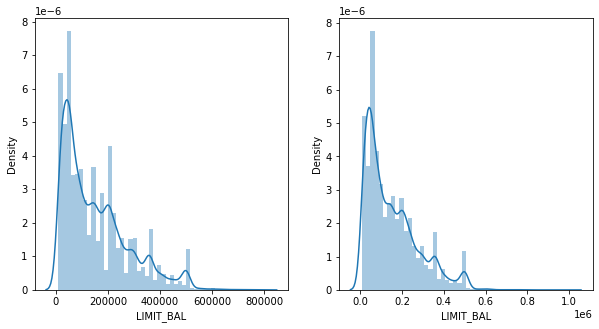

In [156]:
#check  for LIMIT_BAL  feature 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(x_tr_lg['LIMIT_BAL'])
plt.subplot(1,2,2)
sns.distplot(x_ts_lg['LIMIT_BAL'])
#  the "LIMIT_BAL" is right  skewed 

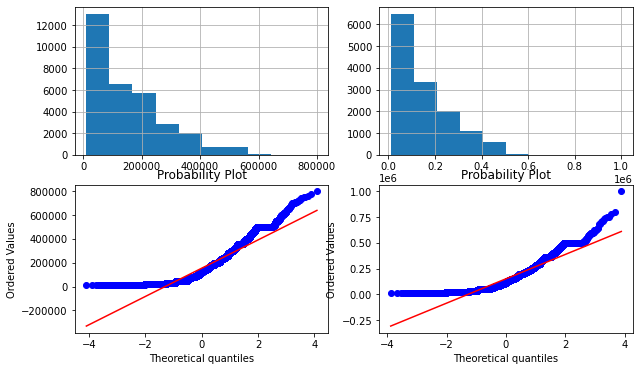

In [135]:
# plotting  the  qq plot  using scipy
plot_data('LIMIT_BAL')

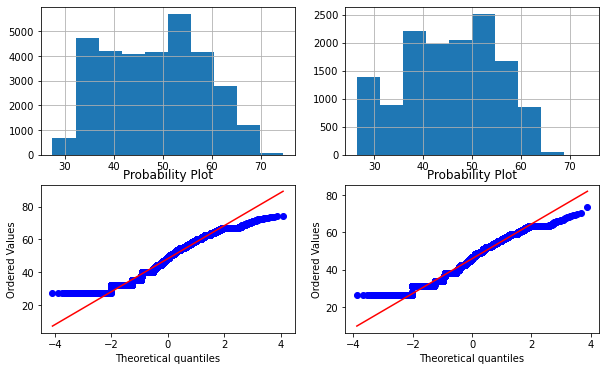

In [136]:
#boxcox transformation
x_tr_lg['LIMIT_BAL_boxcox'],param=stats.boxcox(x_tr_lg['LIMIT_BAL'])
x_ts_lg['LIMIT_BAL_boxcox'],param=stats.boxcox(x_ts_lg['LIMIT_BAL'])


plot_data('LIMIT_BAL_boxcox')

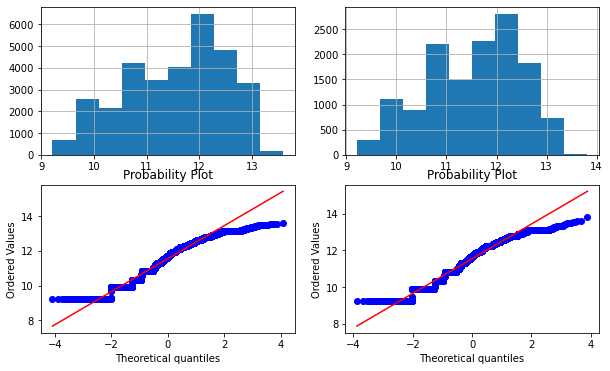

In [137]:
#log transformation
x_tr_lg['LIMIT_BAL_log']=np.log(x_tr_lg['LIMIT_BAL'])
x_ts_lg['LIMIT_BAL_log']=np.log(x_ts_lg['LIMIT_BAL'])


plot_data('LIMIT_BAL_log')

In [157]:
x_tr_lg

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
30258,30000.000000,2,0,0,0,0,0,26541.530711,27556.438746,28967.605037,30028.773140,26671.040009,27782.123025
452,80000.000000,-1,-1,-1,-1,-1,-1,1689.000000,8638.000000,5702.000000,2980.000000,1260.000000,7868.000000
39996,50000.000000,0,0,0,0,0,0,39605.621947,40562.905604,41253.805259,41411.467063,41276.693300,41359.559973
30248,140000.000000,1,2,2,0,0,0,39570.892776,43351.991983,42754.789173,44093.441590,45833.923196,46903.614797
30181,127193.532795,2,2,0,0,0,0,72439.567942,70557.500735,69547.352915,8918.272385,11189.915540,6418.650277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,150000.000000,0,0,0,0,0,0,59885.000000,59054.000000,60254.000000,59604.000000,60707.000000,61988.000000
44732,60000.000000,0,0,0,0,0,0,60461.832719,61247.436309,59726.414872,30324.321744,40606.535510,25102.605536
38158,20000.000000,0,0,0,0,0,0,15731.302199,16749.273753,17562.312818,17037.856493,16326.724795,10393.624744
860,50000.000000,0,0,0,-1,0,0,23587.000000,24580.000000,20165.000000,10732.000000,10566.000000,10757.000000


In [141]:
# from the  above qq-plot  boxcox transformation  gives best result 
# lets select the  LIMIT_BAL_boxcox feature 
x_tr_lg.drop(['LIMIT_BAL_log','LIMIT_BAL'],axis=1,inplace=True)
x_ts_lg.drop(['LIMIT_BAL_log','LIMIT_BAL'],axis=1,inplace=True)

In [158]:
x_tr_lg

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
30258,30000.000000,2,0,0,0,0,0,26541.530711,27556.438746,28967.605037,30028.773140,26671.040009,27782.123025
452,80000.000000,-1,-1,-1,-1,-1,-1,1689.000000,8638.000000,5702.000000,2980.000000,1260.000000,7868.000000
39996,50000.000000,0,0,0,0,0,0,39605.621947,40562.905604,41253.805259,41411.467063,41276.693300,41359.559973
30248,140000.000000,1,2,2,0,0,0,39570.892776,43351.991983,42754.789173,44093.441590,45833.923196,46903.614797
30181,127193.532795,2,2,0,0,0,0,72439.567942,70557.500735,69547.352915,8918.272385,11189.915540,6418.650277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,150000.000000,0,0,0,0,0,0,59885.000000,59054.000000,60254.000000,59604.000000,60707.000000,61988.000000
44732,60000.000000,0,0,0,0,0,0,60461.832719,61247.436309,59726.414872,30324.321744,40606.535510,25102.605536
38158,20000.000000,0,0,0,0,0,0,15731.302199,16749.273753,17562.312818,17037.856493,16326.724795,10393.624744
860,50000.000000,0,0,0,-1,0,0,23587.000000,24580.000000,20165.000000,10732.000000,10566.000000,10757.000000


In [159]:
# USING THE  StandardScaler TRANSFORMATION
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
x_tr_scaled=sc.fit_transform(x_tr_lg)
x_ts_scaled=sc.fit_transform(x_ts_lg)



In [160]:
from  sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
logModel=LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logModel, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)


In [161]:
 grid_result = grid_search.fit(x_tr_lg_scaled, y_tr_lg)

In [162]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.676423 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [163]:
logModel_final=LogisticRegression(C=100,penalty='l2',solver='newton-cg')

In [164]:
logModel_final.fit(x_tr_scaled,y_tr_lg)

LogisticRegression(C=100, solver='newton-cg')

In [167]:
from sklearn.metrics import accuracy_score ,confusion_matrix
y_pred_lg=logModel_final.predict(x_ts_scaled)

accuracy_score(y_ts_lg,y_pred_lg)


0.6759571659087575

# decision tree

In [54]:
x_tr_rf

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
38974,180000.000000,0,0,0,0,0,0,72070.270987,66713.714155,57285.719430,53913.709870,46600.429593,40139.164421
14709,50000.000000,0,0,0,0,0,2,8400.000000,9412.000000,10433.000000,11443.000000,12268.000000,11928.000000
33087,100000.000000,2,1,0,0,0,0,91842.159480,84038.108052,84641.551689,85400.231169,77961.174026,79702.760000
36391,202316.431337,1,1,0,0,0,0,206549.453348,198086.364587,195617.232431,299173.105547,190427.873440,191787.991414
5066,20000.000000,1,3,2,2,-1,-1,21003.000000,20260.000000,9686.000000,0.000000,6884.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,80000.000000,-1,2,2,2,2,3,4269.000000,4057.000000,5326.000000,5092.000000,6008.000000,5618.000000
44732,194027.204965,-1,-1,-1,-1,-1,-1,7469.852293,597.327074,3813.294846,18866.693083,3620.189745,5190.416862
38158,350000.000000,2,2,5,6,5,5,2104.688972,1947.993324,2295.285120,2183.036796,2104.688972,2026.341148
860,400000.000000,1,1,1,2,0,0,13611.000000,15066.000000,15882.000000,12599.000000,18599.000000,12284.000000


In [74]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier  
param_grid = {'min_samples_split':[2,4,6,8,10],'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}


In [80]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(x_tr_rf, y_tr_rf)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [81]:
grid_DTC_clf.best_score_

0.7070383625290387

In [82]:
 grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [83]:
model_dt=DecisionTreeClassifier(max_depth=20,min_samples_split=0.1)

In [84]:
model_dt.fit(x_tr_rf, y_tr_rf)

DecisionTreeClassifier(max_depth=20, min_samples_split=0.1)

In [85]:
from sklearn.metrics import accuracy_score ,confusion_matrix

ypred_dt=model_dt.predict(x_ts_rf)
accuracy_score(y_ts_rf,ypred_dt)

0.707222384998535

<AxesSubplot:>

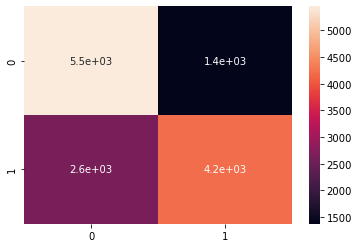

In [86]:
sns.heatmap(confusion_matrix(y_ts_rf,ypred_dt),annot=True)

# As We Can See That RandomForest Classifier Gives Best Result .So Lets Choose the RandomForest Classifier.

In [94]:
#Performing  K-fold cross validation
from sklearn.model_selection import  StratifiedKFold
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import  RandomForestClassifier
skfold=StratifiedKFold(10)
scores=cross_val_score(RandomForestClassifier(),x_tr_rf,y_tr_rf,cv=skfold)


The Maximum  Accuracy that RandomForest Classifier Can Provide: 0.8524332810047096
The Minimum  Accuracy that RandomForest Classifier Can Provide: 0.8266875981161695
The Average  Accuracy that RandomForest Classifier Can Provide: 0.8342128484017103


Text(0.5, 1.0, 'The  Accuracy of RandomForest Classifier')

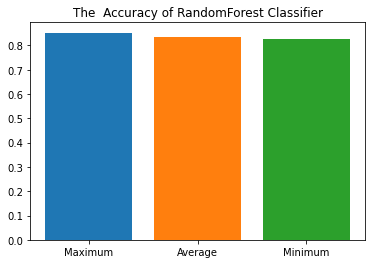

In [109]:
print("The Maximum  Accuracy that RandomForest Classifier Can Provide: {}".format(max(scores)))
print("The Minimum  Accuracy that RandomForest Classifier Can Provide: {}".format(min(scores)))
print("The Average  Accuracy that RandomForest Classifier Can Provide: {}".format(np.mean(scores)))
plt.bar(['Maximum'],[max(scores)])
plt.bar(['Average'],[np.mean(scores)])
plt.bar(['Minimum'],[min(scores)])
plt.title("The  Accuracy of RandomForest Classifier")

# Saving  the  model  using  the pickle  



In [111]:
# import  pickle  
# with  open('./models/credit_rf','wb'a) as f:
#     pickle.dump(randmf,f)

In [113]:
f= open('./models/credit_rf','rb') 
credit=pickle.load(f)

In [122]:
pre_data=pd.DataFrame([[50000.000000,0,0,0,0,0,2,8400.000000,66713.714155,57285.719430,53913.709870,46600.429593,40139.164421]],columns=x_ts_rf.columns)
credit.predict(pre_data)[0]

0

In [119]:
x_ts_rf

38974    1
14709    0
33087    1
36391    1
5066     1
        ..
11284    1
44732    1
38158    1
860      0
15795    1
Name: default, Length: 31854, dtype: int64